<a href="https://colab.research.google.com/github/leisafira/Final-Project-Statistics/blob/main/Cervical_Cancer_Risk_Factor_Statistics_for_Business_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

In [3]:
cerv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kag_risk_factors_cervical_cancer.csv', na_values='?')
cerv

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
# Mengganti atribut kolom agar lebih sederhana.
# memanggil atribut kolom dari dataframe
cerv.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [5]:
# membuat nama kolom baru yang lebih sederhana
new_column_name = ['age', 'num_sex_partner', 'first_sex',
       'num_pregnancy', 'smoke', 'smoke_year', 'smoke_pack_year',
       'hormon_contracept', 'hormon_contracept_year', 'IUD',
       'IUD_year', 'STD', 'num_STD', 'STD_condy',
       'STD_cerv_condy', 'STD_vag_condy',
       'STD_vulvo_condy', 'STD_syphilis',
       'STD_pid', 'STD_herpes',
       'STD_mollusc_contag', 'STD_AIDS', 'STD_HIV',
       'STD_hep_B', 'STD_HPV', 'STD_num_dx','STD_first', 'STD_last',
       'dx_cancer', 'dx_CIN', 'dx_HPV', 'dx', 'hinselmann', 'schiller',
       'citology', 'biopsy']

# update nama kolom
cerv.columns = new_column_name

# memanggil data set
cerv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     858 non-null    int64  
 1   num_sex_partner         832 non-null    float64
 2   first_sex               851 non-null    float64
 3   num_pregnancy           802 non-null    float64
 4   smoke                   845 non-null    float64
 5   smoke_year              845 non-null    float64
 6   smoke_pack_year         845 non-null    float64
 7   hormon_contracept       750 non-null    float64
 8   hormon_contracept_year  750 non-null    float64
 9   IUD                     741 non-null    float64
 10  IUD_year                741 non-null    float64
 11  STD                     753 non-null    float64
 12  num_STD                 753 non-null    float64
 13  STD_condy               753 non-null    float64
 14  STD_cerv_condy          753 non-null    fl

In [6]:
#Check the data first
cerv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     858 non-null    int64  
 1   num_sex_partner         832 non-null    float64
 2   first_sex               851 non-null    float64
 3   num_pregnancy           802 non-null    float64
 4   smoke                   845 non-null    float64
 5   smoke_year              845 non-null    float64
 6   smoke_pack_year         845 non-null    float64
 7   hormon_contracept       750 non-null    float64
 8   hormon_contracept_year  750 non-null    float64
 9   IUD                     741 non-null    float64
 10  IUD_year                741 non-null    float64
 11  STD                     753 non-null    float64
 12  num_STD                 753 non-null    float64
 13  STD_condy               753 non-null    float64
 14  STD_cerv_condy          753 non-null    fl

In [7]:
# Pertama, mengecek proporsi jumlah missing values yang terdapat pada setiap features.
# Kedua, mengecek jumlah data yang terduplikasi.

print("Missing values proportion:")
print(cerv.isnull().sum()/cerv.shape[0]) # Untuk menghitung proporsi dari missing values pada setiap features/kolom.
print("="*50)
print("Duplicate data:")
print(cerv.duplicated().sum()) # Untuk menghitung jumlah data yang terduplikasi.

Missing values proportion:
age                       0.000000
num_sex_partner           0.030303
first_sex                 0.008159
num_pregnancy             0.065268
smoke                     0.015152
smoke_year                0.015152
smoke_pack_year           0.015152
hormon_contracept         0.125874
hormon_contracept_year    0.125874
IUD                       0.136364
IUD_year                  0.136364
STD                       0.122378
num_STD                   0.122378
STD_condy                 0.122378
STD_cerv_condy            0.122378
STD_vag_condy             0.122378
STD_vulvo_condy           0.122378
STD_syphilis              0.122378
STD_pid                   0.122378
STD_herpes                0.122378
STD_mollusc_contag        0.122378
STD_AIDS                  0.122378
STD_HIV                   0.122378
STD_hep_B                 0.122378
STD_HPV                   0.122378
STD_num_dx                0.000000
STD_first                 0.917249
STD_last                  0.

In [8]:
#Remove columns that have >50% Missing Values
cerv.drop(['STD_first', 'STD_last'], axis = 1, inplace = True)
cerv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     858 non-null    int64  
 1   num_sex_partner         832 non-null    float64
 2   first_sex               851 non-null    float64
 3   num_pregnancy           802 non-null    float64
 4   smoke                   845 non-null    float64
 5   smoke_year              845 non-null    float64
 6   smoke_pack_year         845 non-null    float64
 7   hormon_contracept       750 non-null    float64
 8   hormon_contracept_year  750 non-null    float64
 9   IUD                     741 non-null    float64
 10  IUD_year                741 non-null    float64
 11  STD                     753 non-null    float64
 12  num_STD                 753 non-null    float64
 13  STD_condy               753 non-null    float64
 14  STD_cerv_condy          753 non-null    fl

In [9]:
# Pertama, menghilangkan data yang terduplikasi.
# Kedua, mengecek persentasi data yang hilang apabila dilakukan penghilangan missing values. Jika persentasi data yang hilang kurang dari 10 %, maka dapat dilanjutkan dengan tahapan berikutnya.

cerv.drop_duplicates(inplace = True) # Untuk menghilangkan data yang terduplikasi.
cerv_new = cerv.dropna() # Untuk menghilangkan missing values pada data.
loss = 100 - (cerv_new.shape[0]/cerv.shape[0])*100 # Untuk menghitung persentase jumlah data yang hilang setelah dilakukan penghapusan data terduplikasi dan missing values.

print("Duplicated data:")
print(cerv.duplicated().sum())
print("="*50)
print("Data info:")
print(cerv_new.info())
print("="*50)
print("Percentage data loss:")
print(f"{np.round(loss,3)} %")

Duplicated data:
0
Data info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     650 non-null    int64  
 1   num_sex_partner         650 non-null    float64
 2   first_sex               650 non-null    float64
 3   num_pregnancy           650 non-null    float64
 4   smoke                   650 non-null    float64
 5   smoke_year              650 non-null    float64
 6   smoke_pack_year         650 non-null    float64
 7   hormon_contracept       650 non-null    float64
 8   hormon_contracept_year  650 non-null    float64
 9   IUD                     650 non-null    float64
 10  IUD_year                650 non-null    float64
 11  STD                     650 non-null    float64
 12  num_STD                 650 non-null    float64
 13  STD_condy               650 non-null    float64
 14  STD_cerv_con

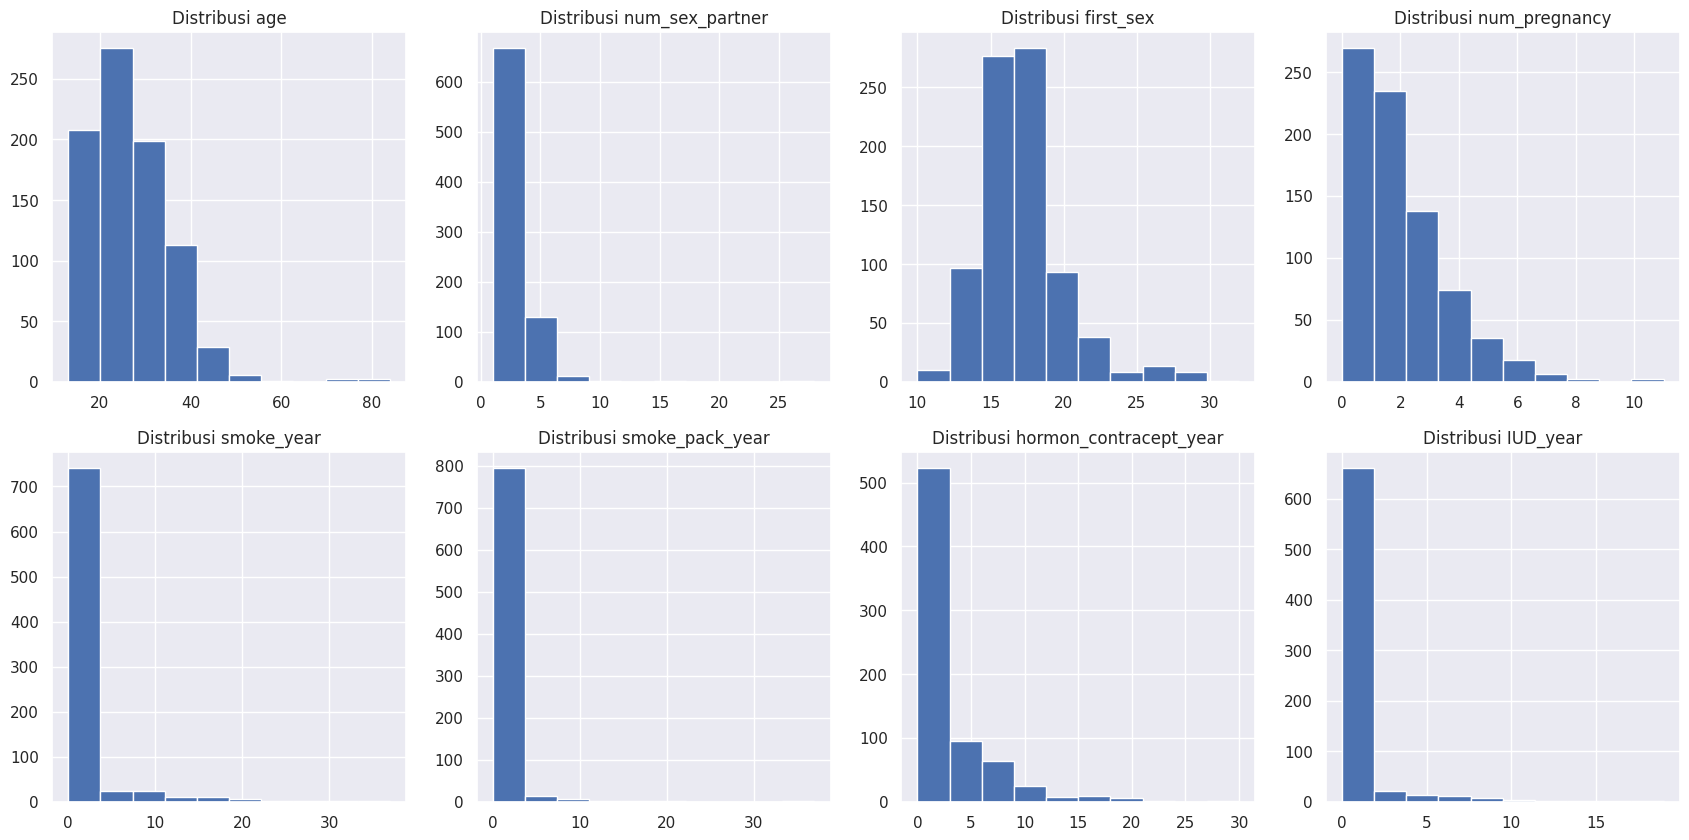

In [10]:
# Melihat distribusi setiap features.
columns_ = ["age", "num_sex_partner", "first_sex", "num_pregnancy", "smoke_year", "smoke_pack_year", "hormon_contracept_year", "IUD_year"]
index_ = 0
fig, ax = plt.subplots(2,4, figsize = (21,10)) # membuat figur dan axis untuk subplots
for row in range(2):
    for col in range(4):
        ax[row,col].hist(cerv[columns_[index_]])
        ax[row,col].set_title(f"Distribusi {columns_[index_]}")
        index_ += 1
plt.show()

In [11]:
# memeriksa deskriptif statistik dari beberapa variabel yang bukan binary
cerv2 = cerv[["age","num_sex_partner", "first_sex", "num_pregnancy", "smoke_year", "smoke_pack_year", "hormon_contracept_year", "IUD_year", "num_STD", "STD_num_dx"]].mean()
cerv2

age                       27.023952
num_sex_partner            2.551852
first_sex                 17.020531
num_pregnancy              2.304236
smoke_year                 1.253850
smoke_pack_year            0.465823
hormon_contracept_year     2.302916
IUD_year                   0.527621
num_STD                    0.180952
STD_num_dx                 0.089820
dtype: float64

In [12]:
cerv

,age,num_sex_partner,first_sex,num_pregnancy,smoke,smoke_year,smoke_pack_year,hormon_contracept,hormon_contracept_year,IUD,IUD_year,STD,num_STD,STD_condy,STD_cerv_condy,STD_vag_condy,STD_vulvo_condy,STD_syphilis,STD_pid,STD_herpes,STD_mollusc_contag,STD_AIDS,STD_HIV,STD_hep_B,STD_HPV,STD_num_dx,dx_cancer,dx_CIN,dx_HPV,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [13]:
# Karena data yang hilang jika langsung menghilangkan data yang tidak lengkap, dilakukan input missing values dengan menggunakan statistik.
cerv["num_sex_partner"] = cerv["num_sex_partner"].fillna(value = np.round(cerv["num_sex_partner"].median())) 
cerv["first_sex"] = cerv["first_sex"].fillna(value = cerv["first_sex"].median())
cerv["num_pregnancy"] = cerv["num_pregnancy"].fillna(value = cerv["num_pregnancy"].median())
cerv["smoke_year"] = cerv["smoke_year"].fillna(value = cerv["smoke_year"].median())
cerv["smoke_pack_year"] = cerv["smoke_pack_year"].fillna(value = cerv["smoke_pack_year"].median())
cerv["hormon_contracept_year"] = cerv["hormon_contracept_year"].fillna(value = cerv["hormon_contracept_year"].median())
cerv["IUD_year"] = cerv["IUD_year"].fillna(value = cerv["IUD_year"].median())

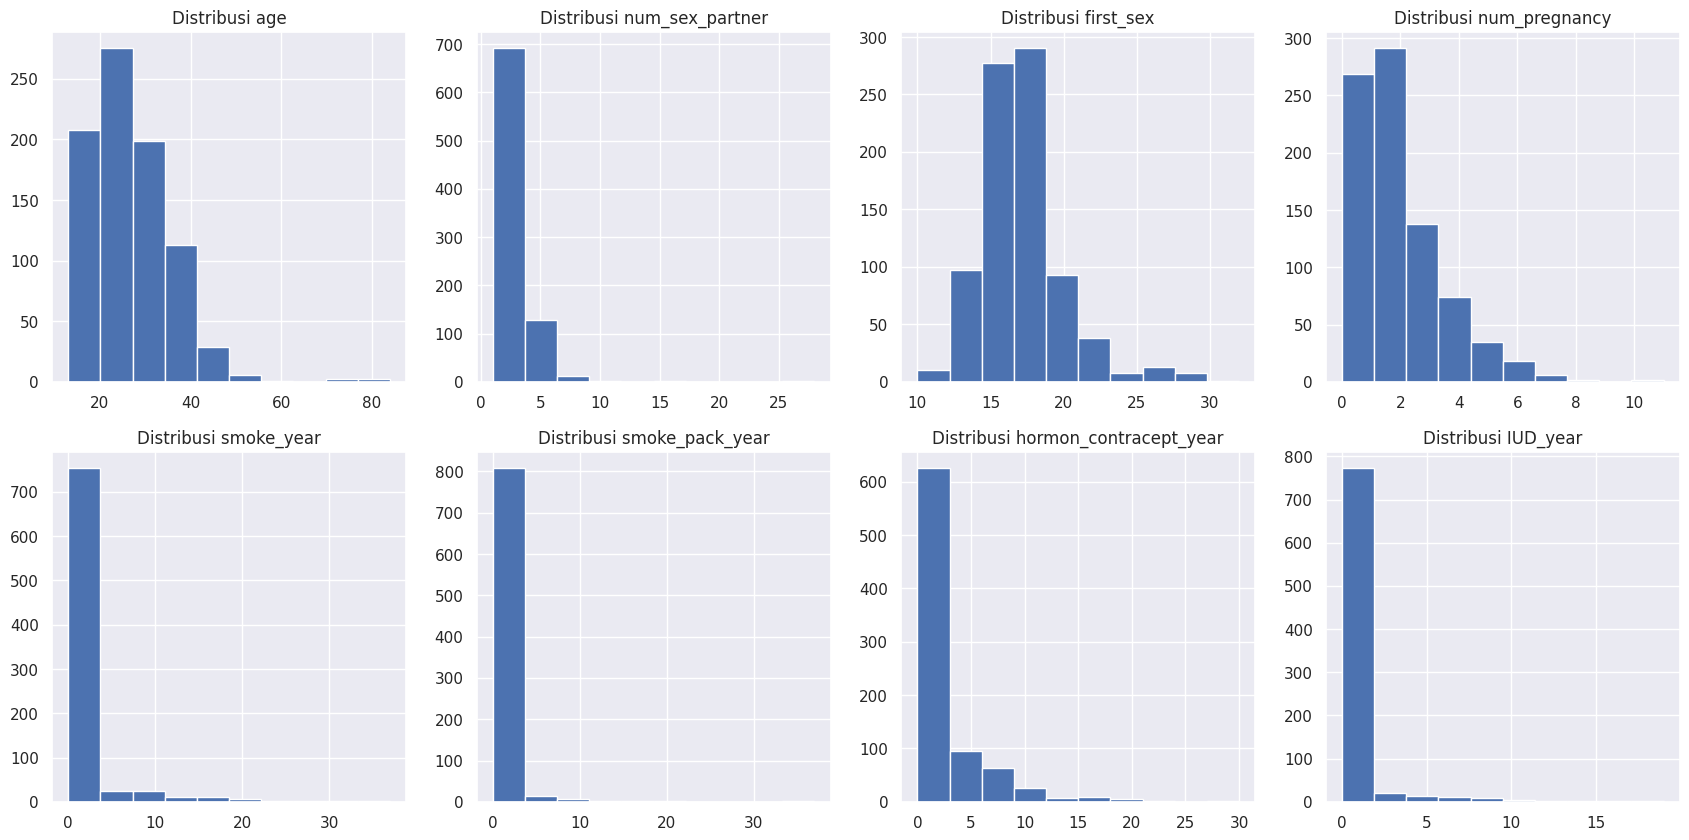

In [14]:
# Melihat kembali distribusi setiap features setelah missing value diisi.
columns_ = ["age", "num_sex_partner", "first_sex", "num_pregnancy", "smoke_year", "smoke_pack_year", "hormon_contracept_year", "IUD_year"]
index_ = 0
fig, ax = plt.subplots(2,4, figsize = (21,10)) # membuat figur dan axis untuk subplots
for row in range(2):
    for col in range(4):
        ax[row,col].hist(cerv[columns_[index_]])
        ax[row,col].set_title(f"Distribusi {columns_[index_]}")
        index_ += 1
plt.show()

In [15]:
# Memeriksa proporsi missing value setelah dilakukan input
print("Missing values proportion:")
print(cerv.isnull().sum()/cerv.shape[0])

Missing values proportion:
age                       0.000000
num_sex_partner           0.000000
first_sex                 0.000000
num_pregnancy             0.000000
smoke                     0.015569
smoke_year                0.000000
smoke_pack_year           0.000000
hormon_contracept         0.123353
hormon_contracept_year    0.000000
IUD                       0.134132
IUD_year                  0.000000
STD                       0.119760
num_STD                   0.119760
STD_condy                 0.119760
STD_cerv_condy            0.119760
STD_vag_condy             0.119760
STD_vulvo_condy           0.119760
STD_syphilis              0.119760
STD_pid                   0.119760
STD_herpes                0.119760
STD_mollusc_contag        0.119760
STD_AIDS                  0.119760
STD_HIV                   0.119760
STD_hep_B                 0.119760
STD_HPV                   0.119760
STD_num_dx                0.000000
dx_cancer                 0.000000
dx_CIN                    0.

In [16]:
# Menghilangkan missing value pada data yang masih ada
cerv.dropna(inplace = True)
cerv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     708 non-null    int64  
 1   num_sex_partner         708 non-null    float64
 2   first_sex               708 non-null    float64
 3   num_pregnancy           708 non-null    float64
 4   smoke                   708 non-null    float64
 5   smoke_year              708 non-null    float64
 6   smoke_pack_year         708 non-null    float64
 7   hormon_contracept       708 non-null    float64
 8   hormon_contracept_year  708 non-null    float64
 9   IUD                     708 non-null    float64
 10  IUD_year                708 non-null    float64
 11  STD                     708 non-null    float64
 12  num_STD                 708 non-null    float64
 13  STD_condy               708 non-null    float64
 14  STD_cerv_condy          708 non-null    fl

In [17]:
# Mencari proporsi dari observasi kolom ya/ tidak (binary)
smoke = cerv[cerv["smoke"] == 1]
not_smoke = cerv[cerv["smoke"] == 0]

n_smoke = smoke.shape[0] # Menghitung jumlah observasi pada kategori merokok.
n_not_smoke = not_smoke.shape[0] # Menghitung jumlah observasi pada kategori tidak merokok.

print(f'Banyak sampel untuk kategori merokok      \t= {n_smoke}')
print(f'Banyak sampel untuk kategori tidak merokok\t= {n_not_smoke}')
print('='*50)

IUD = cerv[cerv["IUD"] == 1]
not_IUD = cerv[cerv["IUD"] == 0]

n_IUD = IUD.shape[0] # Menghitung jumlah observasi pada kategori IUD.
n_not_IUD = not_IUD.shape[0] # Menghitung jumlah observasi pada kategori tidak menggunakan IUD.

print(f'Banyak sampel untuk kategori IUD      \t= {n_IUD}')
print(f'Banyak sampel untuk kategori tidak IUD\t= {n_not_IUD}')
print('='*50)

STD_condy = cerv[cerv["STD_condy"] == 1]
not_STD_condy = cerv[cerv["STD_condy"] == 0]

n_STD_condy = STD_condy.shape[0] # Menghitung jumlah observasi pada kategori STD Condy.
n_not_STD_condy = not_STD_condy.shape[0] # Menghitung jumlah observasi pada kategori tidak STD Condy.

print(f'Banyak sampel untuk kategori STD condylomatosis      \t= {n_STD_condy}')
print(f'Banyak sampel untuk kategori tidak STD condylomatosis\t= {n_not_STD_condy}')
print('='*50)

STD_cerv_condy = cerv[cerv["STD_cerv_condy"] == 1]
not_STD_cerv_condy = cerv[cerv["STD_cerv_condy"] == 0]

n_STD_cerv_condy = STD_cerv_condy.shape[0] # Menghitung jumlah observasi pada kategori STD Cervical Condy.
n_not_STD_cerv_condy = not_STD_cerv_condy.shape[0] # Menghitung jumlah observasi pada kategori tidak STD Cervical Condy.

print(f'Banyak sampel untuk kategori STD condylomatosis serviks      \t= {n_STD_cerv_condy}')
print(f'Banyak sampel untuk kategori tidak STD condylomatosis serviks\t= {n_not_STD_cerv_condy}')
print('='*50)

STD_vag_condy = cerv[cerv["STD_vag_condy"] == 1]
not_STD_vag_condy = cerv[cerv["STD_vag_condy"] == 0]

n_STD_vag_condy = STD_vag_condy.shape[0] # Menghitung jumlah observasi pada kategori STD Vaginal Condy.
n_not_STD_vag_condy = not_STD_vag_condy.shape[0] # Menghitung jumlah observasi pada kategori tidak STD Vaginal Condy.

print(f'Banyak sampel untuk kategori STD vaginal condylomatosis      \t= {n_STD_vag_condy}')
print(f'Banyak sampel untuk kategori tidak STD vaginal condylomatosis\t= {n_not_STD_vag_condy}')
print('='*50)

STD_vulvo_condy = cerv[cerv["STD_vulvo_condy"] == 1]
not_STD_vulvo_condy = cerv[cerv["STD_vulvo_condy"] == 0]

n_STD_vulvo_condy = STD_vulvo_condy.shape[0] # Menghitung jumlah observasi pada kategori STD Vulvo Perineal Condy.
n_not_STD_vulvo_condy = not_STD_vulvo_condy.shape[0] # Menghitung jumlah observasi pada kategori tidak STD Vulvo Perinal Condy.

print(f'Banyak sampel untuk kategori vulvo condylomatosis      \t= {n_STD_vulvo_condy}')
print(f'Banyak sampel untuk kategori tidak vulvo condylomatosis\t= {n_not_STD_vulvo_condy}')
print('='*50)

STD_syphilis = cerv[cerv["STD_syphilis"] == 1]
not_STD_syphilis = cerv[cerv["STD_syphilis"] == 0]

n_STD_syphilis = STD_syphilis.shape[0] # Menghitung jumlah observasi pada kategori STD Syphilis.
n_not_STD_syphilis = not_STD_syphilis.shape[0] # Menghitung jumlah observasi pada kategori tidak STD Syphilis.

print(f'Banyak sampel untuk kategori STD Sifilis      \t= {n_STD_syphilis}')
print(f'Banyak sampel untuk kategori tidak STD Sifilis\t= {n_not_STD_syphilis}')
print('='*50)

STD_pid = cerv[cerv["STD_pid"] == 1]
not_STD_pid = cerv[cerv["STD_pid"] == 0]

n_STD_pid = STD_pid.shape[0] # Menghitung jumlah observasi pada kategori STD pid.
n_not_STD_pid = not_STD_pid.shape[0] # Menghitung jumlah observasi pada kategori tidak STD pid.

print(f'Banyak sampel untuk kategori radang panggul      \t= {n_STD_pid}')
print(f'Banyak sampel untuk kategori tidak radang panggul\t= {n_not_STD_pid}')
print('='*50)

STD_herpes = cerv[cerv["STD_herpes"] == 1]
not_STD_herpes = cerv[cerv["STD_herpes"] == 0]

n_STD_herpes = STD_herpes.shape[0] # Menghitung jumlah observasi pada kategori STD herpes.
n_not_STD_herpes = not_STD_herpes.shape[0] # Menghitung jumlah observasi pada kategori tidak STD herpes.

print(f'Banyak sampel untuk kategori STD herpes      \t= {n_STD_herpes}')
print(f'Banyak sampel untuk kategori tidak STD herpes\t= {n_not_STD_herpes}')
print('='*50)

STD_mollusc_contag = cerv[cerv["STD_mollusc_contag"] == 1]
not_STD_mollusc_contag = cerv[cerv["STD_mollusc_contag"] == 0]

n_STD_mollusc_contag = STD_mollusc_contag.shape[0] # Menghitung jumlah observasi pada kategori STD molluscum contagium.
n_not_STD_mollusc_contag = not_STD_mollusc_contag.shape[0] # Menghitung jumlah observasi pada kategori tidak STD molluscum contagium.

print(f'Banyak sampel untuk kategori STD molluscum contagiosum      \t= {n_STD_mollusc_contag}')
print(f'Banyak sampel untuk kategori tidak STD molluscum contagiosum\t= {n_not_STD_mollusc_contag}')
print('='*50)

STD_AIDS = cerv[cerv["STD_AIDS"] == 1]
not_STD_AIDS = cerv[cerv["STD_AIDS"] == 0]

n_STD_AIDS = STD_AIDS.shape[0] # Menghitung jumlah observasi pada kategori STD AIDS.
n_not_STD_AIDS = not_STD_AIDS.shape[0] # Menghitung jumlah observasi pada kategori tidak STD AIDS.

print(f'Banyak sampel untuk kategori STD AIDS      \t= {n_STD_AIDS}')
print(f'Banyak sampel untuk kategori tidak STD AIDS\t= {n_not_STD_AIDS}')
print('='*50)

STD_HIV = cerv[cerv["STD_HIV"] == 1]
not_STD_HIV = cerv[cerv["STD_HIV"] == 0]

n_STD_HIV = STD_HIV.shape[0] # Menghitung jumlah observasi pada kategori STD HIV.
n_not_STD_HIV = not_STD_HIV.shape[0] # Menghitung jumlah observasi pada kategori tidak STD HIV.

print(f'Banyak sampel untuk kategori STD HIV      \t= {n_STD_HIV}')
print(f'Banyak sampel untuk kategori tidak STD HIV\t= {n_not_STD_HIV}')
print('='*50)

STD_hep_B = cerv[cerv["STD_hep_B"] == 1]
not_STD_hep_B = cerv[cerv["STD_hep_B"] == 0]

n_STD_hep_B = STD_hep_B.shape[0] # Menghitung jumlah observasi pada kategori STD hepatitis B.
n_not_STD_hep_B = not_STD_hep_B.shape[0] # Menghitung jumlah observasi pada kategori tidak STD hepatitis B.

print(f'Banyak sampel untuk kategori STD hepatitis B      \t= {n_STD_hep_B}')
print(f'Banyak sampel untuk kategori tidak STD hepatitis B\t= {n_not_STD_hep_B}')
print('='*50)

STD_HPV = cerv[cerv["STD_HPV"] == 1]
not_STD_HPV = cerv[cerv["STD_HPV"] == 0]

n_STD_HPV = STD_HPV.shape[0] # Menghitung jumlah observasi pada kategori STD HPV.
n_not_STD_HPV = not_STD_HPV.shape[0] # Menghitung jumlah observasi pada kategori tidak STD HPV.

print(f'Banyak sampel untuk kategori STD HPV      \t= {n_STD_HPV}')
print(f'Banyak sampel untuk kategori tidak STD HPV\t= {n_not_STD_HPV}')
print('='*50)

STD_num_dx = cerv[cerv["STD_num_dx"] == 1]
not_STD_num_dx = cerv[cerv["STD_num_dx"] == 0]

n_STD_num_dx = STD_num_dx.shape[0] # Menghitung jumlah observasi pada kategori STD number of Dx.
n_not_STD_num_dx = not_STD_num_dx.shape[0] # Menghitung jumlah observasi pada kategori tidak STD number of Dx.

print(f'Banyak sampel untuk kategori STD number of diagnose      \t= {n_STD_num_dx}')
print(f'Banyak sampel untuk kategori tidak STD number of diagnose\t= {n_not_STD_num_dx}')
print('='*50)

dx_cancer = cerv[cerv["dx_cancer"] == 1]
not_dx_cancer = cerv[cerv["dx_cancer"] == 0]

n_dx_cancer = dx_cancer.shape[0] # Menghitung jumlah observasi pada kategori Dx Cancer.
n_not_dx_cancer = not_dx_cancer.shape[0] # Menghitung jumlah observasi pada kategori tidak Dx Cancer.

print(f'Banyak sampel untuk kategori diagnose cancer      \t= {n_dx_cancer}')
print(f'Banyak sampel untuk kategori tidak diagnose cancer\t= {n_not_dx_cancer}')
print('='*50)

dx_CIN = cerv[cerv["dx_CIN"] == 1]
not_dx_CIN = cerv[cerv["dx_CIN"] == 0]

n_dx_CIN = dx_CIN.shape[0] # Menghitung jumlah observasi pada kategori Dx CIN.
n_not_dx_CIN = not_dx_CIN.shape[0] # Menghitung jumlah observasi pada kategori tidak Dx CIN.

print(f'Banyak sampel untuk kategori diagnose CIN      \t= {n_dx_CIN}')
print(f'Banyak sampel untuk kategori tidak diagnose CIN\t= {n_not_dx_CIN}')
print('='*50)

dx_HPV = cerv[cerv["dx_HPV"] == 1]
not_dx_HPV = cerv[cerv["dx_HPV"] == 0]

n_dx_HPV = dx_HPV.shape[0] # Menghitung jumlah observasi pada kategori Dx HPV.
n_not_dx_HPV = not_dx_HPV.shape[0] # Menghitung jumlah observasi pada kategori tidak Dx HPV.

print(f'Banyak sampel untuk kategori diagnose HPV      \t= {n_dx_HPV}')
print(f'Banyak sampel untuk kategori tidak diagnose HPV\t= {n_not_dx_HPV}')
print('='*50)

dx = cerv[cerv["dx"] == 1]
not_dx = cerv[cerv["dx"] == 0]

n_dx = dx.shape[0] # Menghitung jumlah observasi pada kategori Dx.
n_not_dx = not_dx.shape[0] # Menghitung jumlah observasi pada kategori tidak Dx.

print(f'Banyak sampel untuk kategori diagnose      \t= {n_dx}')
print(f'Banyak sampel untuk kategori tidak diagnose\t= {n_not_dx}')
print('='*50)

hinselmann = cerv[cerv["hinselmann"] == 1]
not_hinselmann = cerv[cerv["hinselmann"] == 0]

n_hinselmann = hinselmann.shape[0] # Menghitung jumlah observasi pada kategori Hinselmann.
n_not_hinselmann = not_hinselmann.shape[0] # Menghitung jumlah observasi pada kategori tidak HInselmann.

print(f'Banyak sampel untuk kategori hinselmann      \t= {n_hinselmann}')
print(f'Banyak sampel untuk kategori tidak hinselmann\t= {n_not_hinselmann}')
print('='*50)

schiller = cerv[cerv["schiller"] == 1]
not_schiller = cerv[cerv["schiller"] == 0]

n_schiller = schiller.shape[0] # Menghitung jumlah observasi pada kategori Schiller.
n_not_schiller = not_schiller.shape[0] # Menghitung jumlah observasi pada kategori tidak Schiller.

print(f'Banyak sampel untuk kategori schiller      \t= {n_schiller}')
print(f'Banyak sampel untuk kategori tidak schiller\t= {n_not_schiller}')
print('='*50)

citology = cerv[cerv["citology"] == 1]
not_citology = cerv[cerv["citology"] == 0]

n_citology = citology.shape[0] # Menghitung jumlah observasi pada kategori Citology.
n_not_citology = not_citology.shape[0] # Menghitung jumlah observasi pada kategori tidak Citology.

print(f'Banyak sampel untuk kategori citology      \t= {n_citology}')
print(f'Banyak sampel untuk kategori tidak citology\t= {n_not_citology}')
print('='*50)

biopsy = cerv[cerv["biopsy"] == 1]
not_biopsy = cerv[cerv["biopsy"] == 0]

n_biopsy = biopsy.shape[0] # Menghitung jumlah observasi pada kategori Biopsy.
n_not_biopsy = not_biopsy.shape[0] # Menghitung jumlah observasi pada kategori tidak Biopsy.

print(f'Banyak sampel untuk kategori biopsy      \t= {n_biopsy}')
print(f'Banyak sampel untuk kategori tidak biopsy\t= {n_not_biopsy}')
print('='*50)

Banyak sampel untuk kategori merokok      	= 104
Banyak sampel untuk kategori tidak merokok	= 604
Banyak sampel untuk kategori IUD      	= 81
Banyak sampel untuk kategori tidak IUD	= 627
Banyak sampel untuk kategori STD condylomatosis      	= 39
Banyak sampel untuk kategori tidak STD condylomatosis	= 669
Banyak sampel untuk kategori STD condylomatosis serviks      	= 0
Banyak sampel untuk kategori tidak STD condylomatosis serviks	= 708
Banyak sampel untuk kategori STD vaginal condylomatosis      	= 4
Banyak sampel untuk kategori tidak STD vaginal condylomatosis	= 704
Banyak sampel untuk kategori vulvo condylomatosis      	= 38
Banyak sampel untuk kategori tidak vulvo condylomatosis	= 670
Banyak sampel untuk kategori STD Sifilis      	= 15
Banyak sampel untuk kategori tidak STD Sifilis	= 693
Banyak sampel untuk kategori radang panggul      	= 1
Banyak sampel untuk kategori tidak radang panggul	= 707
Banyak sampel untuk kategori STD herpes      	= 1
Banyak sampel untuk kategori tidak STD

In [18]:
# Mengubah type data menjadi integer
for c in cerv.columns:
    if cerv[c].dtype == np.float:
        cerv[c] = cerv[c].astype(int)

In [20]:
#Memeriksa tipe data
cerv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     708 non-null    int64
 1   num_sex_partner         708 non-null    int64
 2   first_sex               708 non-null    int64
 3   num_pregnancy           708 non-null    int64
 4   smoke                   708 non-null    int64
 5   smoke_year              708 non-null    int64
 6   smoke_pack_year         708 non-null    int64
 7   hormon_contracept       708 non-null    int64
 8   hormon_contracept_year  708 non-null    int64
 9   IUD                     708 non-null    int64
 10  IUD_year                708 non-null    int64
 11  STD                     708 non-null    int64
 12  num_STD                 708 non-null    int64
 13  STD_condy               708 non-null    int64
 14  STD_cerv_condy          708 non-null    int64
 15  STD_vag_condy          

In [21]:
#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

#Construct the model
lm = smf.ols('biopsy ~ age + num_sex_partner + first_sex + num_pregnancy + smoke + smoke_year + smoke_pack_year + hormon_contracept + hormon_contracept_year+ IUD + IUD_year + STD + num_STD + STD_condy + STD_vag_condy +STD_vulvo_condy + STD_syphilis +STD_pid + STD_herpes +STD_mollusc_contag + STD_HIV +STD_hep_B + STD_HPV + STD_num_dx + dx_cancer + dx_CIN + dx_HPV + dx + hinselmann + schiller + citology',
             data = cerv).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 biopsy   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     32.96
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          1.21e-111
Time:                        08:56:36   Log-Likelihood:                 284.92
No. Observations:                 708   AIC:                            -507.8
Df Residuals:                     677   BIC:                            -366.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

Remember to do the **F-test** and the **t-test** hypothesis testing to test whether our model is useful or not and to test the significance of the predictor variables. For this case, we use the significance level $α = 0.05$. We will reject the null hypothesis $H_0$ if the $p$-$value < \alpha$.

The hypothesis for the **F-test** is:
$$
H_0 : \beta_1 = \beta_2 = \ldots = \beta_p = 0 \\
H_1 : At \space least \space 1 \space \beta_i \ne 0 \\
$$

From the output above, we could see the p-value for the F-test is $1.21 \times 10^{-111}$ which is very small, then we reject the null hypothesis $H_0$ and proceed with the t-test to test the significance of the variables partially. The rejection of the null hypothesis $H_0$ in the F-test indicates that the model is useful.

The hypothesis for the **t-test** is:
$$
H_0 : \beta_i = 0 \\
H_1 : \beta_i \ne 0 \\
$$

From the output above, we could see the p-value for the many variables are bigger than the $\alpha = 0.05$ that we defined earlier. Therefore, we should consider **removing** them because they are not **statistically significant**.

In [22]:
# membuat linear regression model dengan menghilang yang secara statistik tidak signifikan
lm1 = smf.ols('biopsy ~ STD + STD_syphilis + STD_herpes + STD_HPV + dx_CIN + hinselmann + schiller + citology',
             data = cerv).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 biopsy   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     119.8
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          1.27e-125
Time:                        08:57:04   Log-Likelihood:                 271.81
No. Observations:                 708   AIC:                            -525.6
Df Residuals:                     699   BIC:                            -484.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0010      0.007      0.142   

In [23]:
# Import module
from scipy.stats import ttest_ind,levene,kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad

In [24]:
# Kode di bawah bertujuan untuk melakukan uji t 2 sampel independen untuk melihat apakah tedapat perbedaan yang signifikan antara yang memiliki STD dan yang tidak memliki STD.
STD = cerv[cerv["STD"] == 1]["biopsy"] # Membuat variabel baru untuk kategori STD.
not_STD = cerv[cerv["STD"] == 0]["biopsy"] # Membuat variabel baru untuk kategori tidak STD.

n_STD = STD.shape[0] # Menghitung jumlah observasi pada kategori STD.
n_not_STD = not_STD.shape[0] # Menghitung jumlah observasi pada kategori tidak STD.
result = ttest_ind(STD,not_STD, equal_var= True, random_state= 42, alternative= 'greater') # Melakukan uji t.

print(f'Banyak sampel untuk kategori STD\t= {n_STD}')
print(f'Banyak sampel untuk kategori tidak STD\t= {n_not_STD}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi :')
print('H0 : mu_STD - mu_tidak STD <= 0')
print('H1 : mu_STD - mu_tidak STD  > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positif\
antara seseorang dengan STD dan yang tidak dengan STD, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang STD memiliki \
rata-rata probabilitas disarankan melakukan biopsy lebih tinggi dibandingkan dengan seseorang yang tidak dengan STD.")

Banyak sampel untuk kategori STD	= 68
Banyak sampel untuk kategori tidak STD	= 640
Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_STD - mu_tidak STD <= 0
H1 : mu_STD - mu_tidak STD  > 0
alpha = 0.05
Statistik hitung = 3.1809171487862336
P Value = 0.0007661733246998563
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positifantara seseorang dengan STD dan yang tidak dengan STD, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang STD memiliki rata-rata probabilitas disarankan melakukan biopsy lebih tinggi dibandingkan dengan seseorang yang tidak dengan STD.


In [25]:
# Kode di bawah bertujuan untuk melakukan uji t 2 sampel independen untuk melihat apakah tedapat perbedaan yang signifikan antara yang memiliki STD_herpes dan yang tidak memliki STD_herpes.
STD_herpes = cerv[cerv["STD_herpes"] == 1]["biopsy"] # Membuat variabel baru untuk kategori STD_herpes.
not_STD_herpes = cerv[cerv["STD_herpes"] == 0]["biopsy"] # Membuat variabel baru untuk kategori tidak STD_herpes.

n_STD_herpes = STD_herpes.shape[0] # Menghitung jumlah observasi pada kategori STD_herpes.
n_not_STD_herpes = not_STD_herpes.shape[0] # Menghitung jumlah observasi pada kategori tidak STD_herpes.
result = ttest_ind(STD_herpes,not_STD_herpes, equal_var= True, random_state= 42, alternative= 'greater') # Melakukan uji t.

print(f'Banyak sampel untuk kategori STD_herpes\t= {n_STD_herpes}')
print(f'Banyak sampel untuk kategori tidak STD_herpes\t= {n_not_STD_herpes}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi :')
print('H0 : mu_STD_herpes - mu_tidak STD_herpes <= 0')
print('H1 : mu_STD_herpes - mu_tidak STD_herpes  > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Uji statistik tidak menghasilkan value statistik hitung dan P Value, karena jumlah yang memiliki positif STD_herpes hanya 1 dari total 708 value yang diinput, nilai terlalu mendekati 0 ")

Banyak sampel untuk kategori STD_herpes	= 1
Banyak sampel untuk kategori tidak STD_herpes	= 707
Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_STD_herpes - mu_tidak STD_herpes <= 0
H1 : mu_STD_herpes - mu_tidak STD_herpes  > 0
alpha = 0.05
Statistik hitung = nan
P Value = nan
Kesimpulan :
Uji statistik tidak menghasilkan value statistik hitung dan P Value, karena jumlah yang memiliki positif STD_herpes hanya 1 dari total 708 value yang diinput, nilai terlalu mendekati 0 


In [26]:
# Kode di bawah bertujuan untuk melakukan uji t 2 sampel independen untuk melihat apakah tedapat perbedaan yang signifikan antara yang memiliki STD_syphilis dan yang tidak memliki STD_syphilis.
STD_syphilis = cerv[cerv["STD_syphilis"] == 1]["biopsy"] # Membuat variabel baru untuk kategori STD_syphilis.
not_STD_syphilis = cerv[cerv["STD_syphilis"] == 0]["biopsy"] # Membuat variabel baru untuk kategori tidak STD_syphilis.

n_STD_syphilis = STD_syphilis.shape[0] # Menghitung jumlah observasi pada kategori STD_syphilis.
n_not_STD_syphilis = not_STD_syphilis.shape[0] # Menghitung jumlah observasi pada kategori tidak STD_syphilis.
result = ttest_ind(STD_syphilis,not_STD_syphilis, equal_var= True, random_state= 42, alternative= 'greater') # Melakukan uji t.

print(f'Banyak sampel untuk kategori STD_syphilis\t= {n_STD_syphilis}')
print(f'Banyak sampel untuk kategori tidak STD_syphilis\t= {n_not_STD_syphilis}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi :')
print('H0 : mu_STD_syphilis - mu_tidak STD_syphilis <= 0')
print('H1 : mu_STD_syphilis - mu_tidak STD_syphilis  > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh > 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positif\
antara seseorang dengan STD_syphilis dan yang tidak dengan STD_syphilis, secara signifikan. Oleh karena itu, diperoleh keputusan gagal untuk menolak H0 yang dimana seseorang yang STD_syphilis memiliki \
rata-rata probabilitas menerima biopsy positif tidak lebih tinggi dibandingkan dengan seseorang yang tidak dengan STD_syphilis.")

Banyak sampel untuk kategori STD_syphilis	= 15
Banyak sampel untuk kategori tidak STD_syphilis	= 693
Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_STD_syphilis - mu_tidak STD_syphilis <= 0
H1 : mu_STD_syphilis - mu_tidak STD_syphilis  > 0
alpha = 0.05
Statistik hitung = -1.0668084758965208
P Value = 0.8567885019608458
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh > 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positifantara seseorang dengan STD_syphilis dan yang tidak dengan STD_syphilis, secara signifikan. Oleh karena itu, diperoleh keputusan gagal untuk menolak H0 yang dimana seseorang yang STD_syphilis memiliki rata-rata probabilitas menerima biopsy positif tidak lebih tinggi dibandingkan dengan seseorang yang tidak dengan STD_syphilis.


In [27]:
# Kode di bawah bertujuan untuk melakukan uji t 2 sampel independen untuk melihat apakah tedapat perbedaan yang signifikan antara yang memiliki STD_HPV dan yang tidak memliki STD_HPV.
STD_HPV = cerv[cerv["STD_HPV"] == 1]["biopsy"] # Membuat variabel baru untuk kategori STD_HPV.
not_STD_HPV = cerv[cerv["STD_HPV"] == 0]["biopsy"] # Membuat variabel baru untuk kategori tidak STD_HPV.

n_STD_HPV = STD_HPV.shape[0] # Menghitung jumlah observasi pada kategori STD_HPV.
n_not_STD_HPV = not_STD_HPV.shape[0] # Menghitung jumlah observasi pada kategori tidak STD_HPV.
result = ttest_ind(STD_HPV,not_STD_HPV, equal_var= True, random_state= 42, alternative= 'greater') # Melakukan uji t.

print(f'Banyak sampel untuk kategori STD_HPV\t= {n_STD_HPV}')
print(f'Banyak sampel untuk kategori tidak STD_HPV\t= {n_not_STD_HPV}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi :')
print('H0 : mu_STD_HPV - mu_tidak STD_HPV <= 0')
print('H1 : mu_STD_HPV - mu_tidak STD_HPV  > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh > 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positif\
antara seseorang dengan STD_HPV dan yang tidak dengan STD_HPV, secara signifikan. Oleh karena itu, diperoleh keputusan untuk gagal menolak H0 yang dimana seseorang yang STD_HPV memiliki \
rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan STD_HPV.")

Banyak sampel untuk kategori STD_HPV	= 2
Banyak sampel untuk kategori tidak STD_HPV	= 706
Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_STD_HPV - mu_tidak STD_HPV <= 0
H1 : mu_STD_HPV - mu_tidak STD_HPV  > 0
alpha = 0.05
Statistik hitung = -0.38567019262073593
P Value = 0.6500714399548853
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh > 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positifantara seseorang dengan STD_HPV dan yang tidak dengan STD_HPV, secara signifikan. Oleh karena itu, diperoleh keputusan untuk gagal menolak H0 yang dimana seseorang yang STD_HPV memiliki rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan STD_HPV.


In [28]:
# Kode di bawah bertujuan untuk melakukan uji t 2 sampel independen untuk melihat apakah tedapat perbedaan yang signifikan antara yang memiliki dx_CIN dan yang tidak memliki dx_CIN.
dx_CIN = cerv[cerv["dx_CIN"] == 1]["biopsy"] # Membuat variabel baru untuk kategori dx_CIN.
not_dx_cin = cerv[cerv["dx_CIN"] == 0]["biopsy"] # Membuat variabel baru untuk kategori tidak dx_CIN.

n_dx_cin = dx_CIN.shape[0] # Menghitung jumlah observasi pada kategori dx_CIN.
n_not_dx_cin = not_dx_cin.shape[0] # Menghitung jumlah observasi pada kategori tidak dx_CIN.
result = ttest_ind(dx_CIN,not_dx_cin, equal_var= True, random_state= 42, alternative= 'greater') # Melakukan uji t.

print(f'Banyak sampel untuk kategori dx_CIN\t= {n_dx_cin}')
print(f'Banyak sampel untuk kategori tidak dx_CIN\t= {n_not_dx_cin}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi :')
print('H0 : mu_dx_cin - mu_tidak dx_CIN <= 0')
print('H1 : mu_dx_cin - mu_tidak dx_CIN  > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positif\
antara seseorang dengan dx_CIN dan yang tidak dengan dx_CIN, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang dx_CIN memiliki \
rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan dx_CIN.")

Banyak sampel untuk kategori dx_CIN	= 6
Banyak sampel untuk kategori tidak dx_CIN	= 702
Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_dx_cin - mu_tidak dx_CIN <= 0
H1 : mu_dx_cin - mu_tidak dx_CIN  > 0
alpha = 0.05
Statistik hitung = 2.5682040022906523
P Value = 0.005213620699258624
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positifantara seseorang dengan dx_CIN dan yang tidak dengan dx_CIN, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang dx_CIN memiliki rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan dx_CIN.


In [29]:
# Kode di bawah bertujuan untuk melakukan uji t 2 sampel independen untuk melihat apakah tedapat perbedaan yang signifikan antara yang memiliki hinselmann dan yang tidak memliki hinselmann.
hinselmann = cerv[cerv["hinselmann"] == 1]["biopsy"] # Membuat variabel baru untuk kategori hinselmann.
not_hinselmann = cerv[cerv["hinselmann"] == 0]["biopsy"] # Membuat variabel baru untuk kategori tidak hinselmann.

n_hinselmann = hinselmann.shape[0] # Menghitung jumlah observasi pada kategori hinselmann.
n_not_hinselmann = not_hinselmann.shape[0] # Menghitung jumlah observasi pada kategori tidak hinselmann.
result = ttest_ind(hinselmann,not_hinselmann, equal_var= True, random_state= 42, alternative= 'greater') # Melakukan uji t.

print(f'Banyak sampel untuk kategori hinselmann\t= {n_hinselmann}')
print(f'Banyak sampel untuk kategori tidak hinselmann\t= {n_not_hinselmann}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi :')
print('H0 : mu_hinselmann - mu_tidak hinselmann <= 0')
print('H1 : mu_hinselmann - mu_tidak hinselmann  > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positif\
antara seseorang dengan hinselmann dan yang tidak dengan hinselmann, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang hinselmann memiliki \
rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan hinselmann.")

Banyak sampel untuk kategori hinselmann	= 33
Banyak sampel untuk kategori tidak hinselmann	= 675
Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_hinselmann - mu_tidak hinselmann <= 0
H1 : mu_hinselmann - mu_tidak hinselmann  > 0
alpha = 0.05
Statistik hitung = 17.356372419418875
P Value = 9.090792731473739e-57
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positifantara seseorang dengan hinselmann dan yang tidak dengan hinselmann, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang hinselmann memiliki rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan hinselmann.


In [30]:
# Kode di bawah bertujuan untuk melakukan uji t 2 sampel independen untuk melihat apakah tedapat perbedaan yang signifikan antara yang memiliki schiller dan yang tidak memliki schiller.
schiller = cerv[cerv["schiller"] == 1]["biopsy"] # Membuat variabel baru untuk kategori schiller.
not_schiller = cerv[cerv["schiller"] == 0]["biopsy"] # Membuat variabel baru untuk kategori tidak schiller.

n_schiller = schiller.shape[0] # Menghitung jumlah observasi pada kategori schiller.
n_not_schiller = not_schiller.shape[0] # Menghitung jumlah observasi pada kategori tidak schiller.
result = ttest_ind(schiller,not_schiller, equal_var= True, random_state= 42, alternative= 'greater') # Melakukan uji t.

print(f'Banyak sampel untuk kategori schiller\t= {n_schiller}')
print(f'Banyak sampel untuk kategori tidak schiller\t= {n_not_schiller}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi :')
print('H0 : mu_schiller - mu_tidak schiller <= 0')
print('H1 : mu_schiller - mu_tidak schiller  > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positif\
antara seseorang dengan schiller dan yang tidak dengan schiller, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang schiller memiliki \
rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan schiller.")

Banyak sampel untuk kategori schiller	= 68
Banyak sampel untuk kategori tidak schiller	= 640
Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_schiller - mu_tidak schiller <= 0
H1 : mu_schiller - mu_tidak schiller  > 0
alpha = 0.05
Statistik hitung = 27.825790530524074
P Value = 6.512536959207057e-116
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positifantara seseorang dengan schiller dan yang tidak dengan schiller, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang schiller memiliki rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan schiller.


In [31]:
# Kode di bawah bertujuan untuk melakukan uji t 2 sampel independen untuk melihat apakah tedapat perbedaan yang signifikan antara yang memiliki citology dan yang tidak memliki citology.
citology = cerv[cerv["citology"] == 1]["biopsy"] # Membuat variabel baru untuk kategori citology.
not_citology = cerv[cerv["citology"] == 0]["biopsy"] # Membuat variabel baru untuk kategori tidak citology.

n_citology = citology.shape[0] # Menghitung jumlah observasi pada kategori citology.
n_not_citology = not_citology.shape[0] # Menghitung jumlah observasi pada kategori tidak citology.
result = ttest_ind(citology,not_citology, equal_var= True, random_state= 42, alternative= 'greater') # Melakukan uji t.

print(f'Banyak sampel untuk kategori citology\t= {n_citology}')
print(f'Banyak sampel untuk kategori tidak citology\t= {n_not_citology}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi :')
print('H0 : mu_citology - mu_tidak citology <= 0')
print('H1 : mu_citology - mu_tidak citology  > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positif\
antara seseorang dengan citology dan yang tidak dengan citology, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang citology memiliki \
rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan citology.")

Banyak sampel untuk kategori citology	= 39
Banyak sampel untuk kategori tidak citology	= 669
Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_citology - mu_tidak citology <= 0
H1 : mu_citology - mu_tidak citology  > 0
alpha = 0.05
Statistik hitung = 9.113386104035992
P Value = 4.0698985621965734e-19
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapatkan biopsy positifantara seseorang dengan citology dan yang tidak dengan citology, secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana seseorang yang citology memiliki rata-rata probabilitas menerima biopsy positif yang lebih tinggi dibandingkan dengan seseorang yang tidak dengan citology.


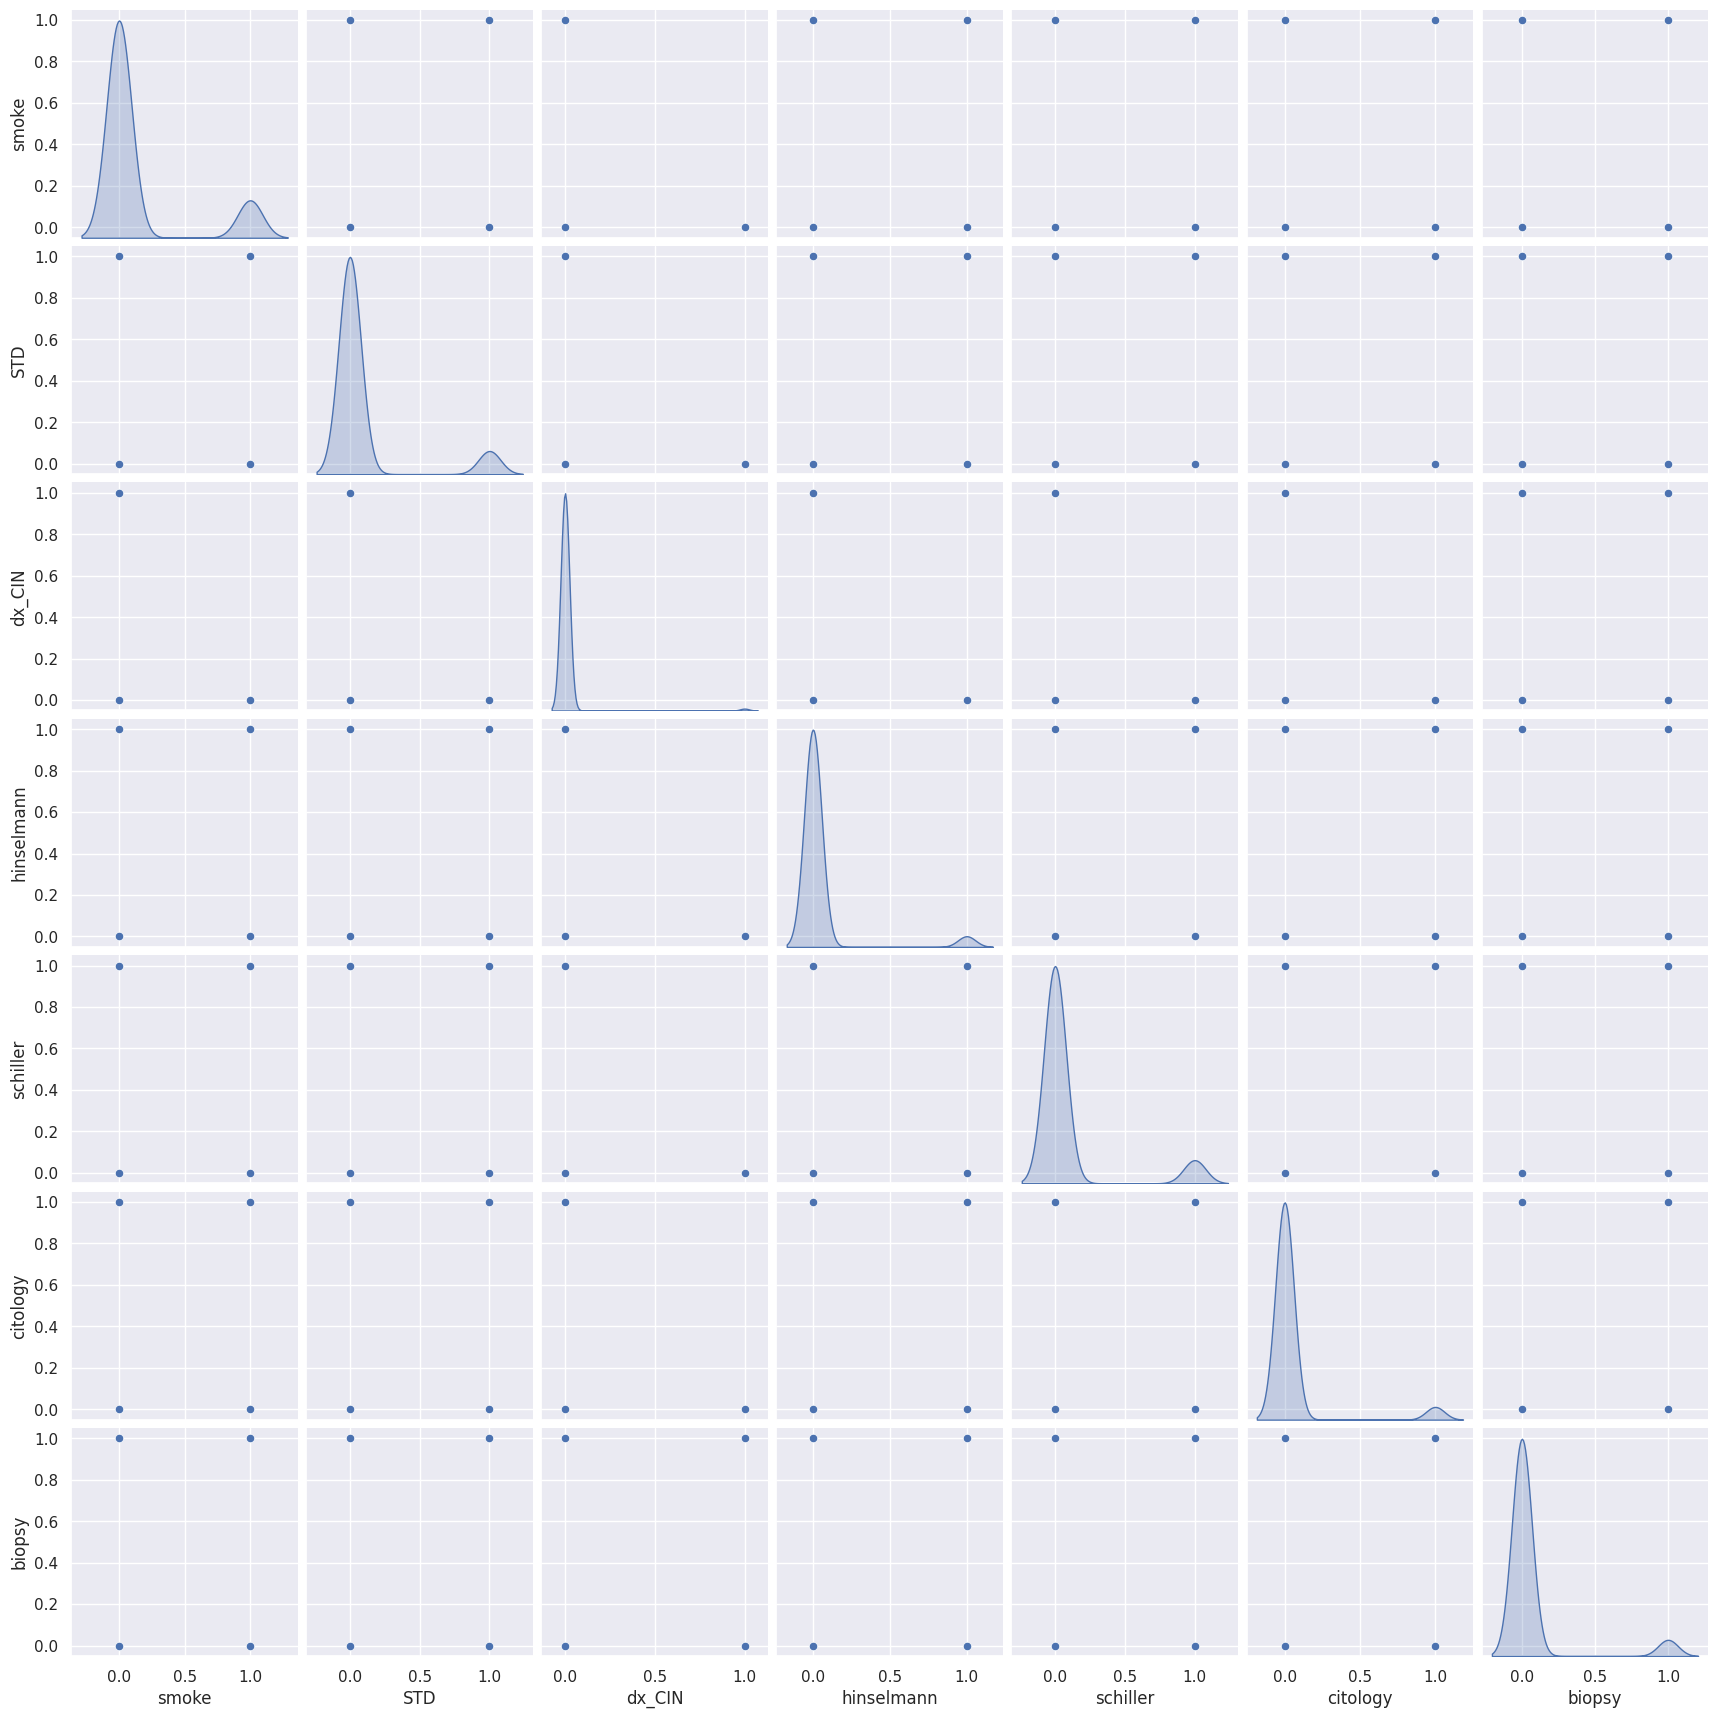

In [32]:
# Kode di bawah bertujuan untuk memvisualisasikan interaksi antara bebera features dengan meggunakan scatter plot dan kde plot.Ternyata tidak menghasilkan visualisasi yang baik karena banyak data berbentuk binary.
columns_ = ["smoke","STD","dx_CIN","hinselmann","schiller","citology","biopsy"]
sns.pairplot(cerv[columns_], diag_kind = 'kde')
plt.show()

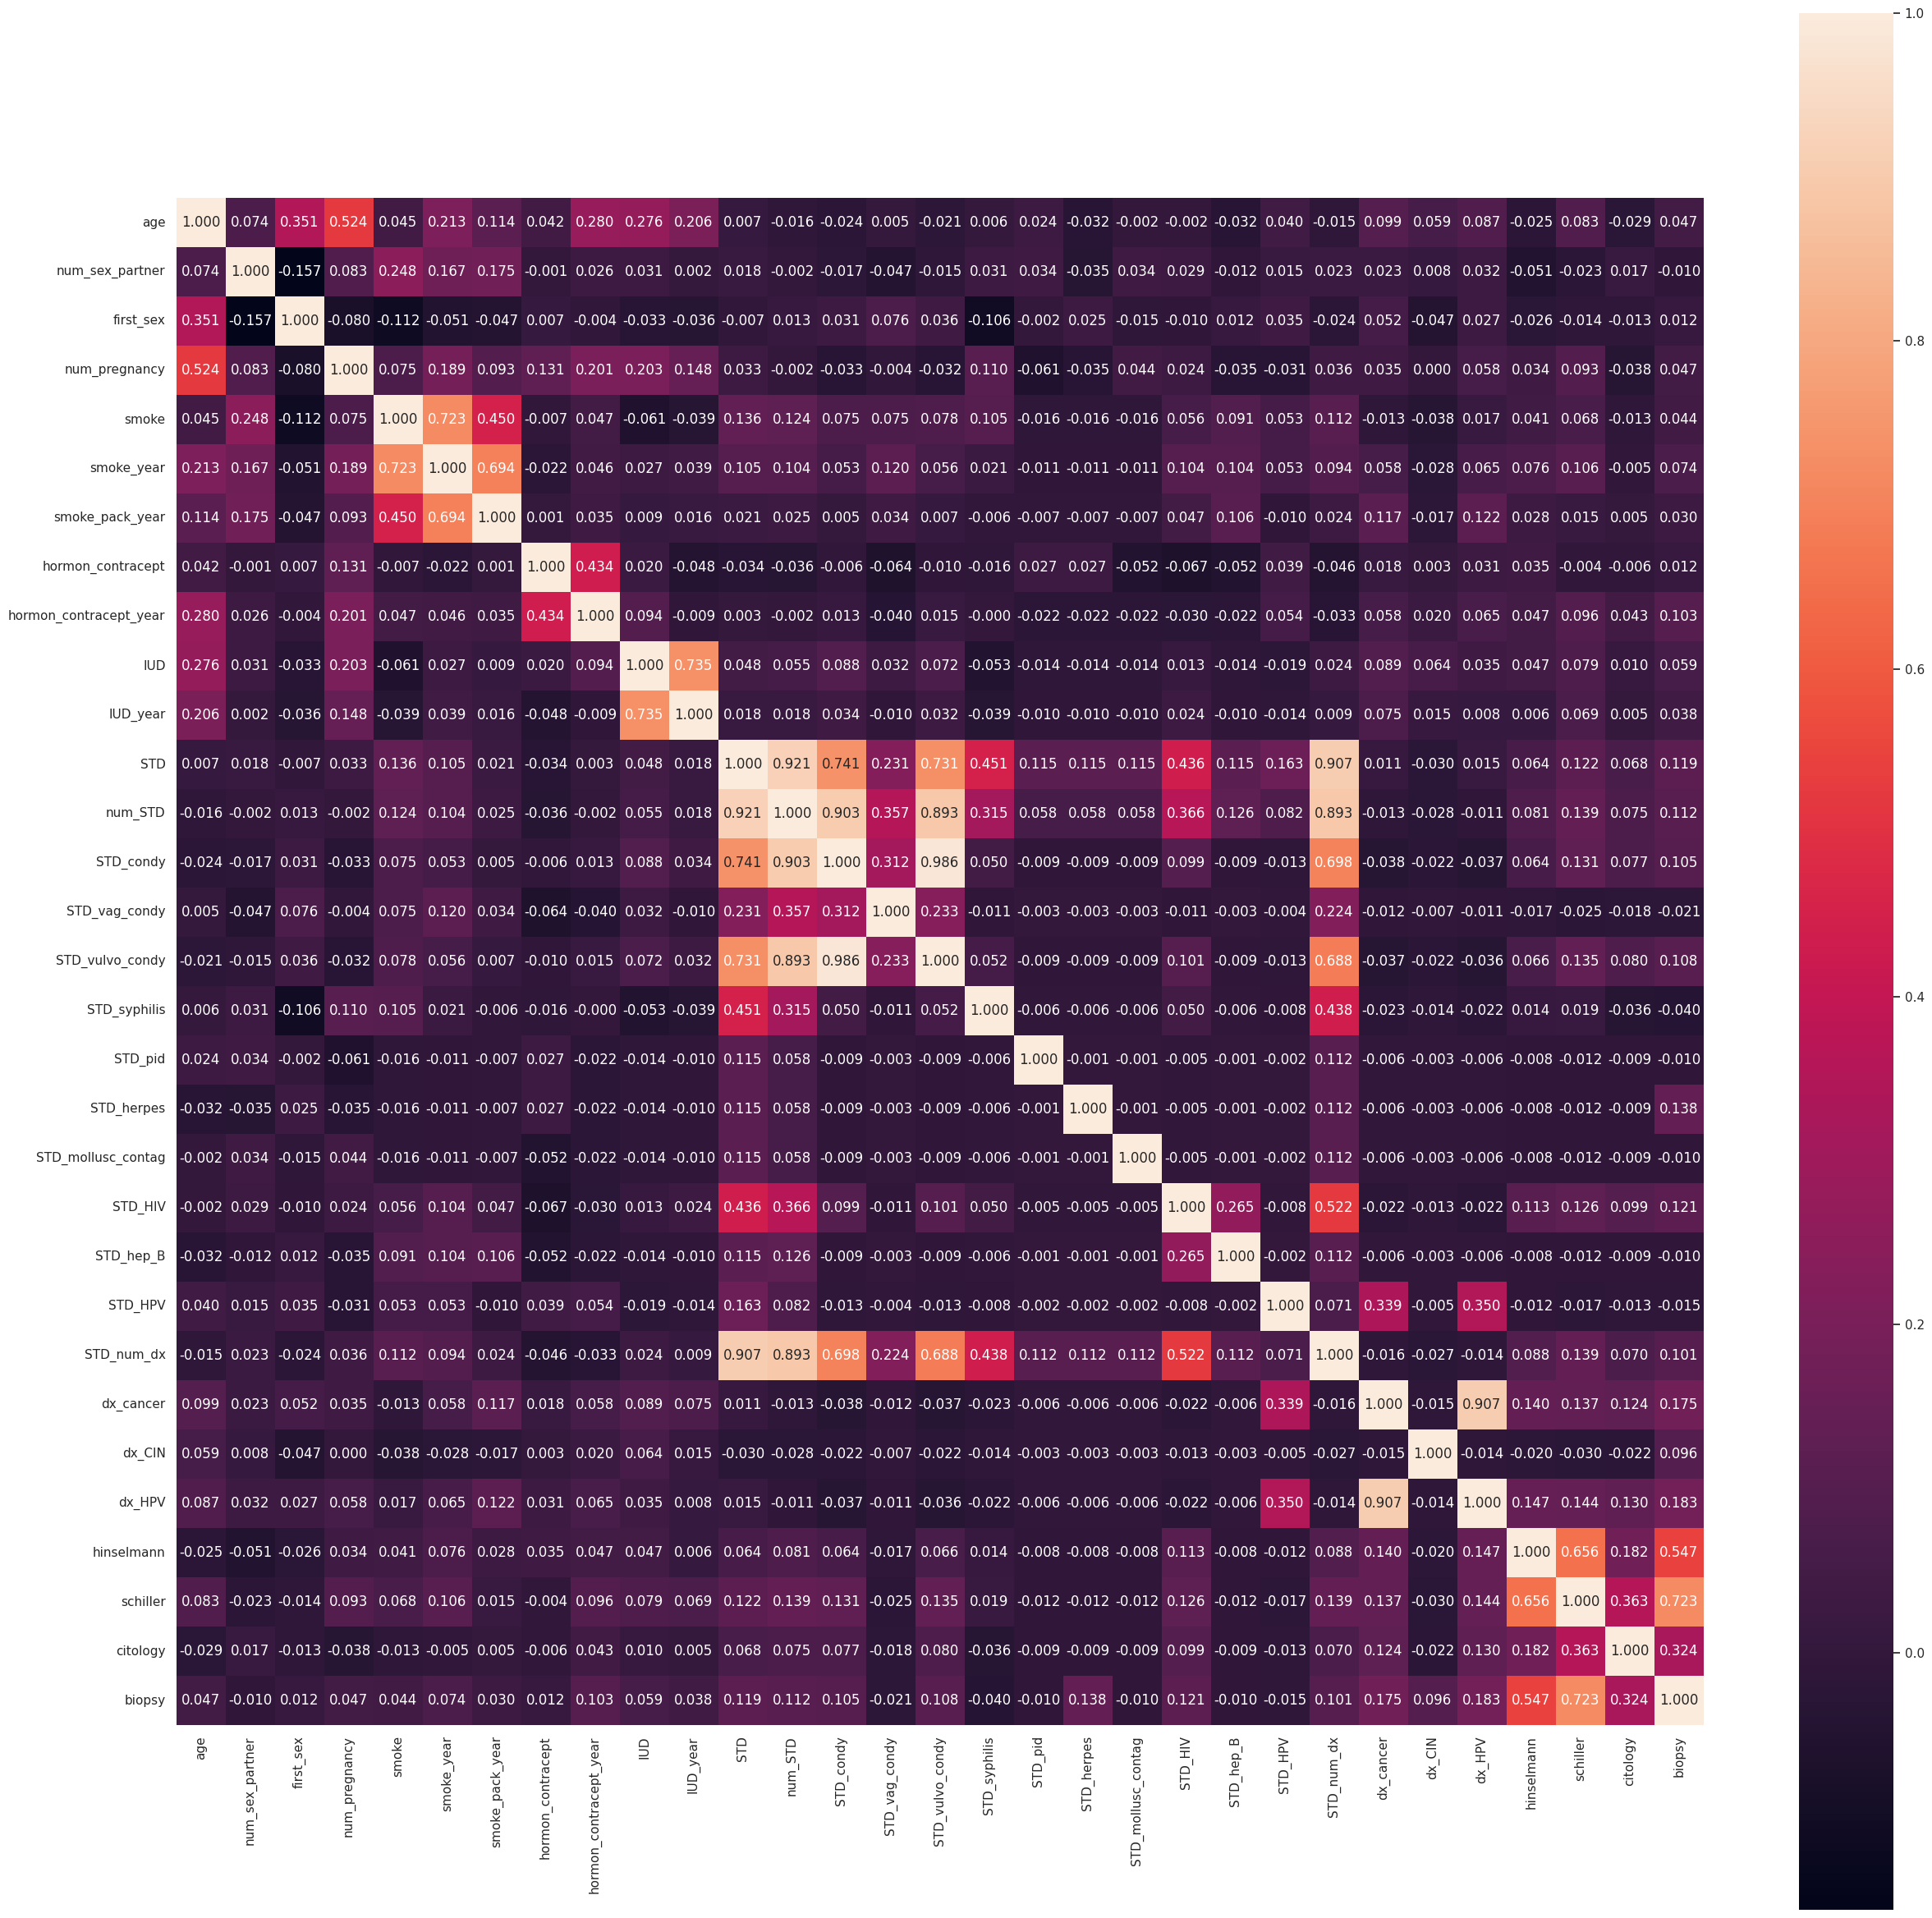

In [33]:
# Kode di bawah untuk melihat korelasi antar features.
columns_ = [ "age" , "num_sex_partner" , "first_sex", "num_pregnancy", "smoke", "smoke_year", "smoke_pack_year", "hormon_contracept", "hormon_contracept_year", "IUD","IUD_year", "STD","num_STD","STD_condy","STD_vag_condy","STD_vulvo_condy", "STD_syphilis","STD_pid", "STD_herpes","STD_mollusc_contag","STD_HIV","STD_hep_B", "STD_HPV","STD_num_dx", "dx_cancer","dx_CIN","dx_HPV","hinselmann","schiller","citology","biopsy"]
corr_ = cerv[columns_].corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

# 'biopsy ~ age + num_sex_partner + first_sex + num_pregnancy + smoke + smoke_year + smoke_pack_year + hormon_contracept + hormon_contracept_year+ IUD + IUD_year + STD + num_STD + STD_condy + STD_vag_condy +STD_vulvo_condy + STD_syphilis +STD_pid + STD_herpes +STD_mollusc_contag + STD_HIV +STD_hep_B + STD_HPV + STD_num_dx + dx_cancer + dx_CIN + dx_HPV + dx + h

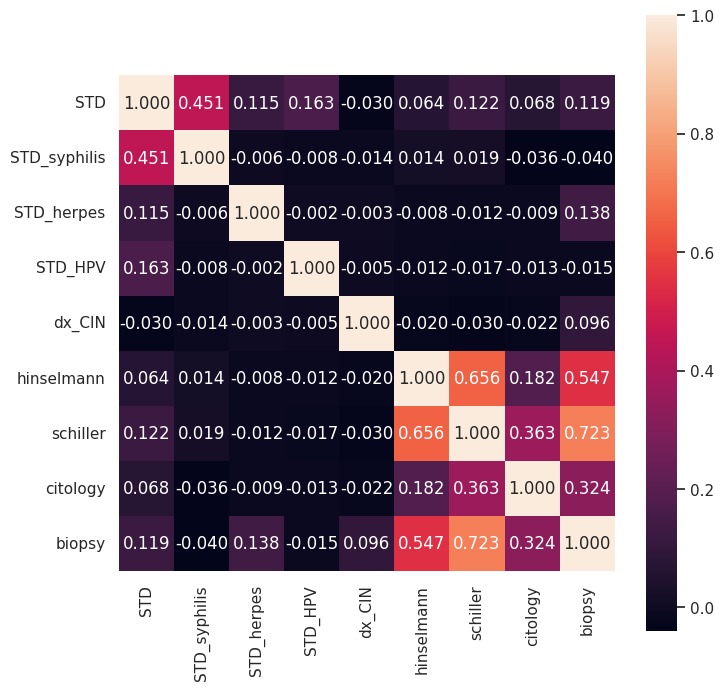

In [34]:
# Kode di bawah untuk melihat korelasi antar features.
columns_ = [ "STD", "STD_syphilis", "STD_herpes", "STD_HPV","dx_CIN","hinselmann","schiller","citology","biopsy"]
corr_ = cerv[columns_].corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

In [35]:
# membuat linear regression model dengan menghilang yang secara statistik tidak signifikan
lm1 = smf.ols('biopsy ~ STD  + dx_CIN + hinselmann + schiller + citology',
             data = cerv).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 biopsy   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     173.9
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          2.96e-120
Time:                        08:59:17   Log-Likelihood:                 251.45
No. Observations:                 708   AIC:                            -490.9
Df Residuals:                     702   BIC:                            -463.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0009      0.007      0.132      0.8

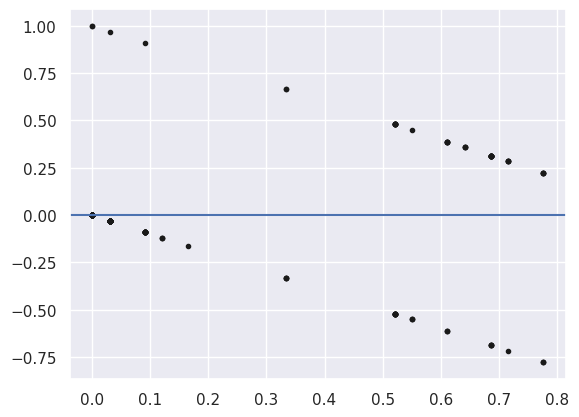

In [36]:
#Uji Asumsi
#Visualize the residual plot
plt.scatter(lm1.fittedvalues, lm1.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

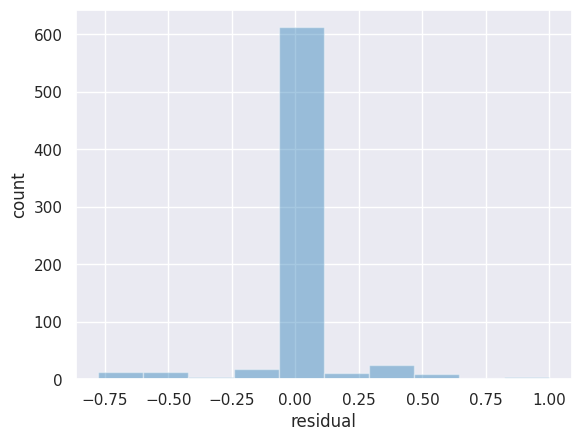

In [37]:
#Plot the distribution of the errors
plt.hist(lm1.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()